<a href="https://colab.research.google.com/github/shristii05/ML_Project/blob/main/Ensemble_Learning_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder

In [2]:
url="https://raw.githubusercontent.com/madhur02/ensemble-learning-loan-dataset/refs/heads/master/train_clean_data.csv"
df=pd.read_csv(url)
df.head()

,Unnamed: 0,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,gender_Male,married_Yes,education_Not Graduate,property_area_Semiurban,property_area_Urban,self_employed_Yes,Loan_status_Y
0,1,LP001003,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
1,2,LP001005,0,3000,0.0,66.0,360.0,1.0,1,1,0,0,1,1,1
2,3,LP001006,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,1,0,1
3,4,LP001008,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,1,0,1
4,5,LP001011,2,5417,4196.0,267.0,360.0,1.0,1,1,0,0,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               517 non-null    int64  
 1   Loan_ID                  517 non-null    object 
 2   Dependents               517 non-null    object 
 3   ApplicantIncome          517 non-null    int64  
 4   CoapplicantIncome        517 non-null    float64
 5   LoanAmount               517 non-null    float64
 6   Loan_Amount_Term         517 non-null    float64
 7   Credit_History           517 non-null    float64
 8   gender_Male              517 non-null    int64  
 9   married_Yes              517 non-null    int64  
 10  education_Not Graduate   517 non-null    int64  
 11  property_area_Semiurban  517 non-null    int64  
 12  property_area_Urban      517 non-null    int64  
 13  self_employed_Yes        517 non-null    int64  
 14  Loan_status_Y            5

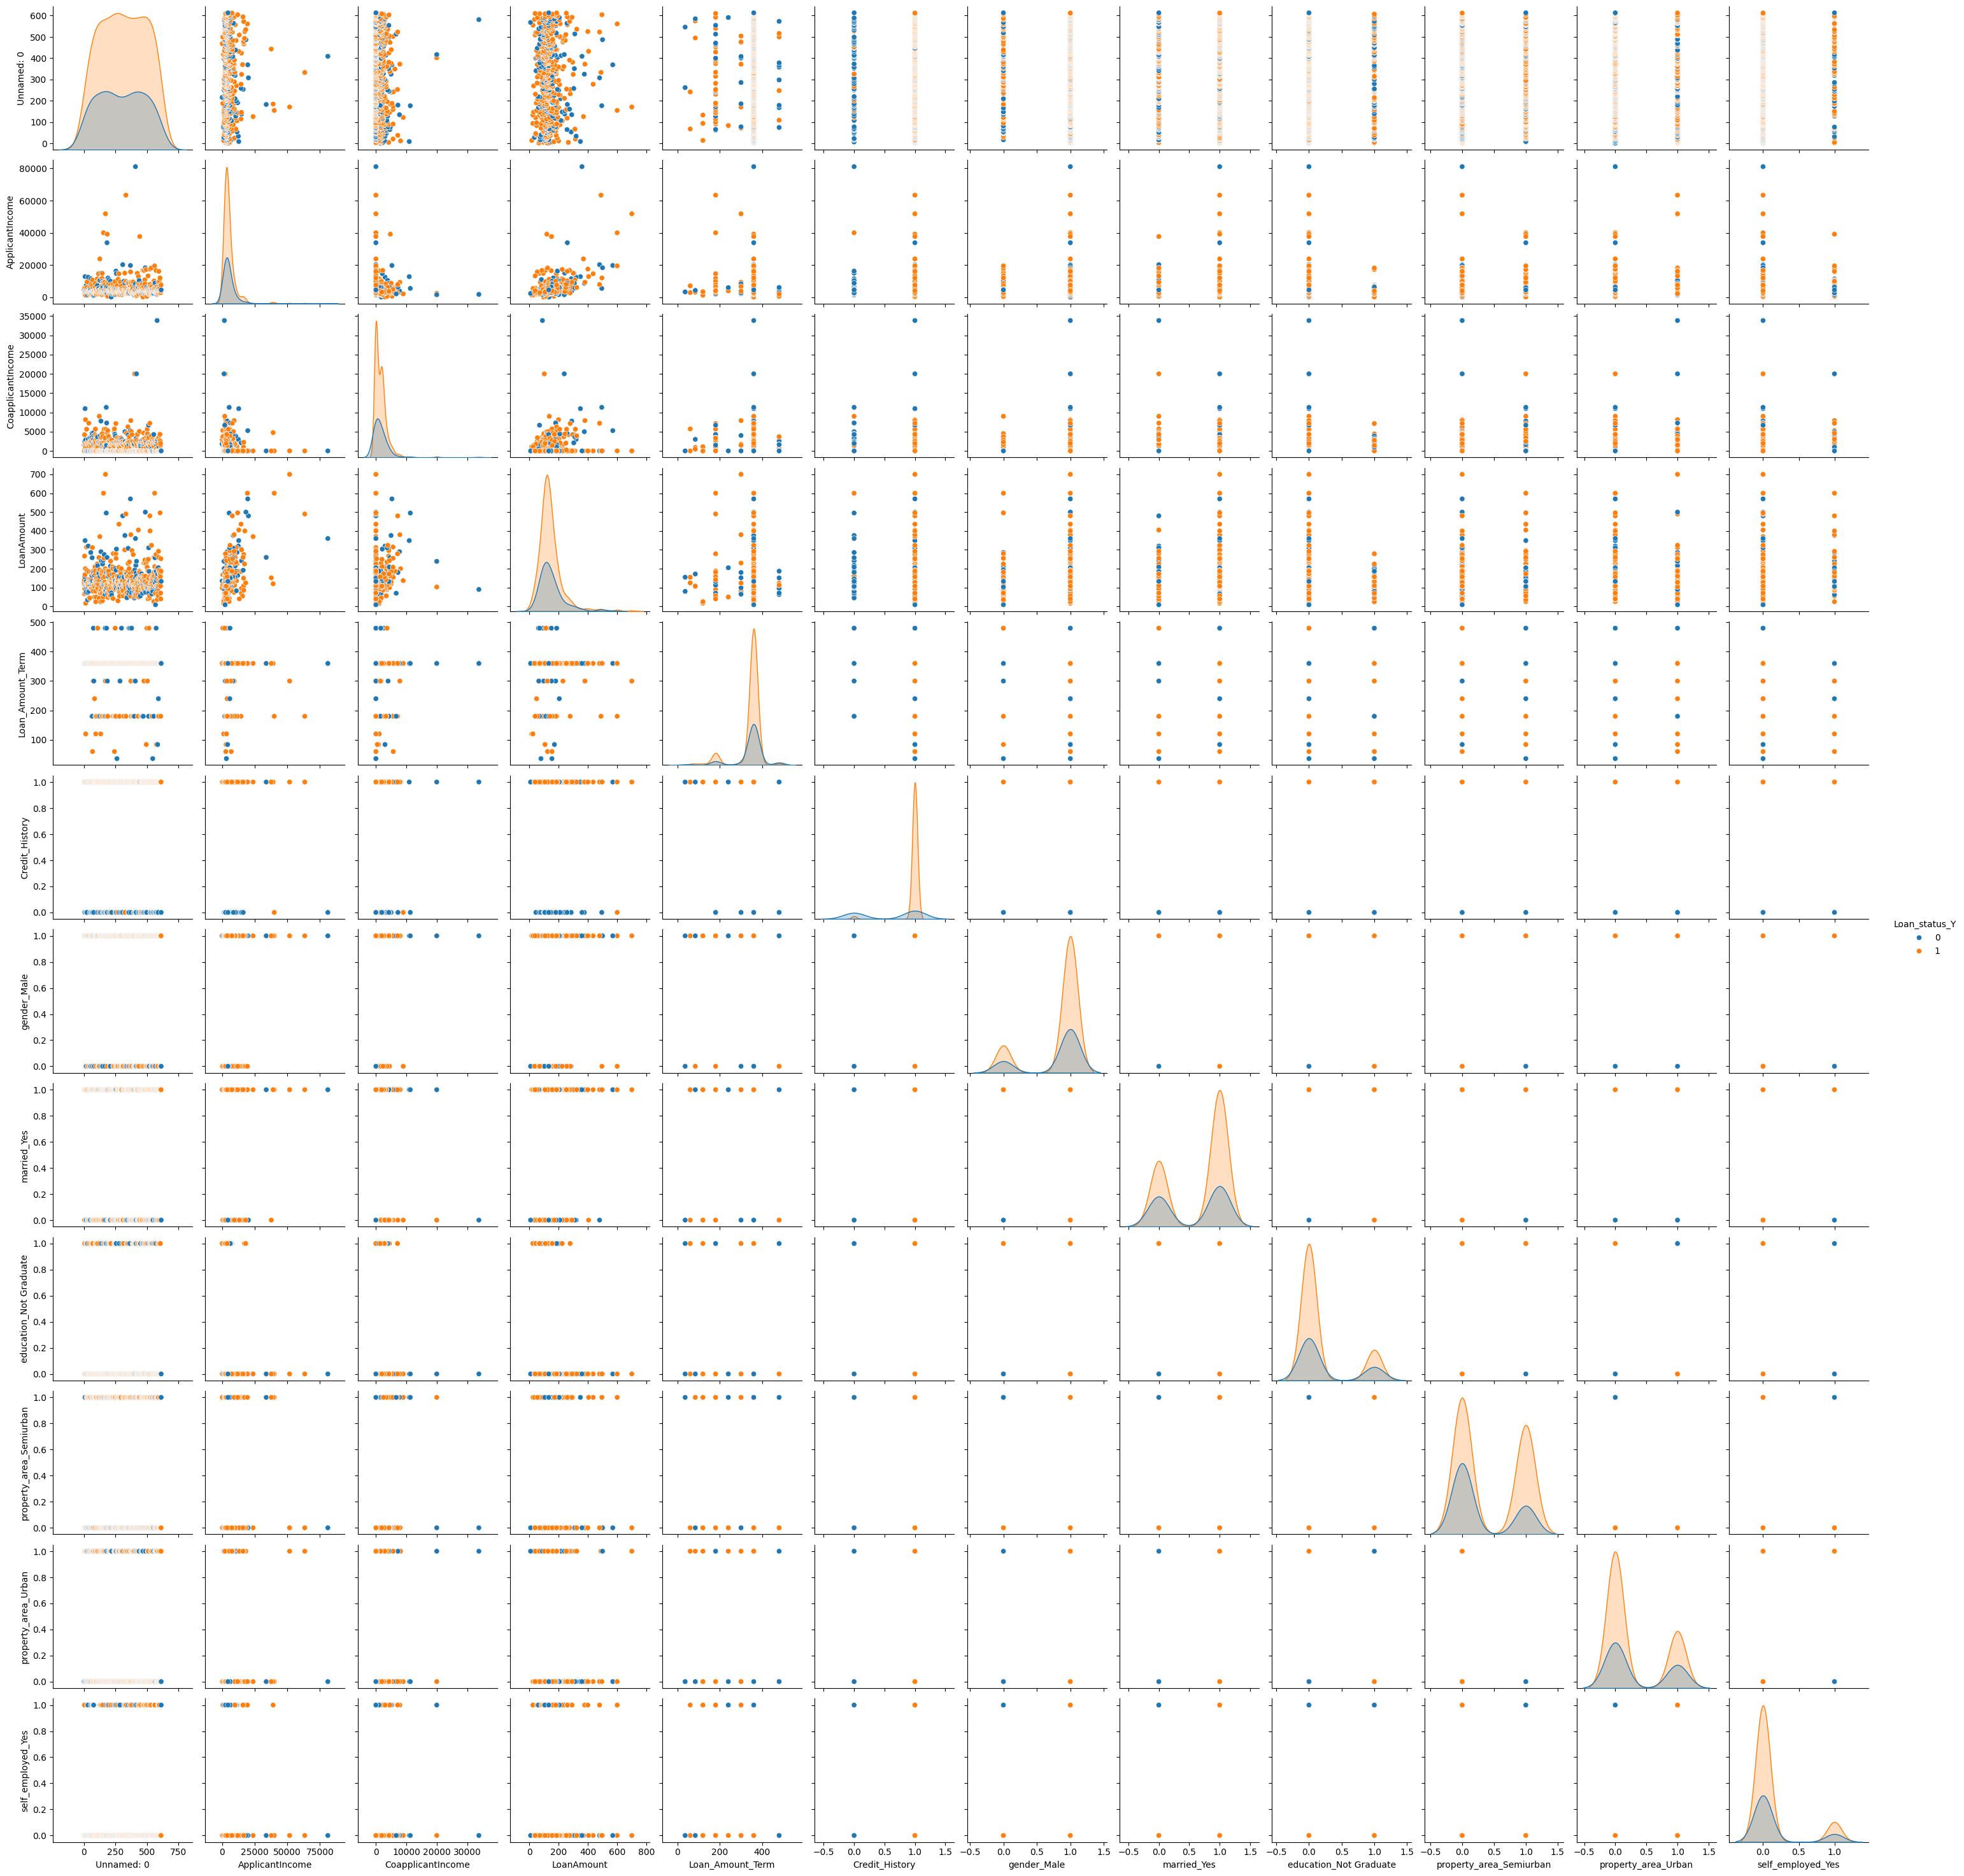

In [3]:
df.info()
df.describe()
sns.pairplot(df, hue='Loan_status_Y')
plt.show()

In [4]:
X = df.drop(['Loan_status_Y','Loan_ID'], axis=1)
y = df['Loan_status_Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
categorical_features = ['Dependents', 'gender_Male','married_Yes', 'education_Not Graduate', 'property_area_Semiurban', 'property_area_Urban','self_employed_Yes']
encoder = OneHotEncoder()
X_train_new=encoder.fit_transform(X_train[categorical_features]).toarray()
X_test_new=encoder.transform(X_test[categorical_features]).toarray()
X_train_new=pd.DataFrame(X_train_new,columns=encoder.get_feature_names_out(categorical_features))

In [6]:
X_train['Dependents'] = X_train['Dependents'].replace('3+', '3')
X_test['Dependents'] = X_test['Dependents'].replace('3+', '3')

Bagging Classifier:
Accuracy Score: 0.8461538461538461
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.52      0.62        25
           1       0.86      0.95      0.90        79

    accuracy                           0.85       104
   macro avg       0.81      0.73      0.76       104
weighted avg       0.84      0.85      0.84       104



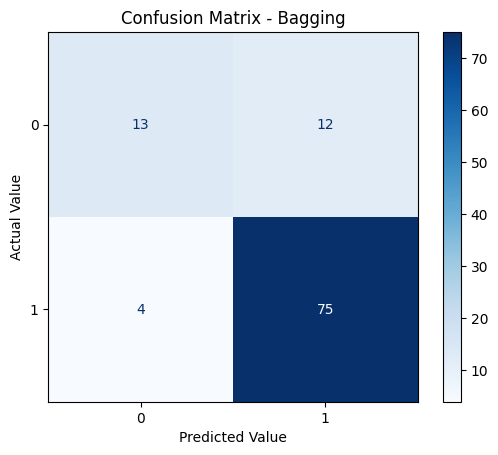

In [7]:
# Bagging Classifier
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
print("Bagging Classifier:")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_bagging)}")
print("Classification Report:\n", classification_report(y_test, y_pred_bagging))
ConfusionMatrixDisplay.from_estimator(bagging_clf, X_test, y_test, cmap='Blues')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix - Bagging')
plt.show()

AdaBoost Classifier:
Accuracy Score: 0.8557692307692307
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.44      0.59        25
           1       0.85      0.99      0.91        79

    accuracy                           0.86       104
   macro avg       0.88      0.71      0.75       104
weighted avg       0.86      0.86      0.84       104



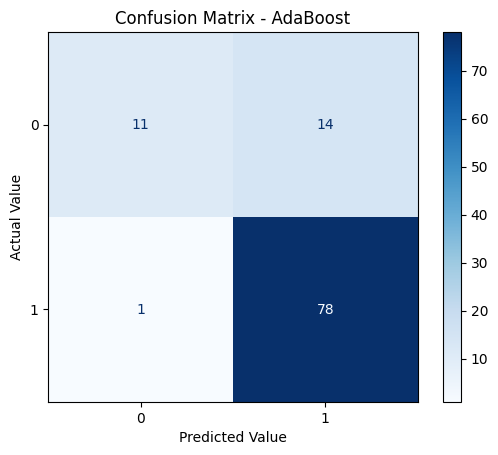

In [8]:
# AdaBoost Classifier
adaboost_clf = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_clf.fit(X_train, y_train)
y_pred_adaboost = adaboost_clf.predict(X_test)
print("AdaBoost Classifier:")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_adaboost)}")
print("Classification Report:\n", classification_report(y_test, y_pred_adaboost))
ConfusionMatrixDisplay.from_estimator(adaboost_clf, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix - AdaBoost')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

Gradient Boosting Classifier:
Accuracy Score: 0.8461538461538461
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.44      0.58        25
           1       0.85      0.97      0.91        79

    accuracy                           0.85       104
   macro avg       0.85      0.71      0.74       104
weighted avg       0.85      0.85      0.83       104



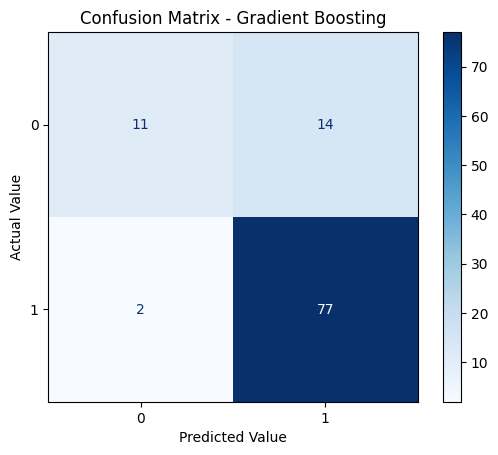

In [9]:
# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=50, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
print("Gradient Boosting Classifier:")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_gb)}")
print("Classification Report:\n", classification_report(y_test, y_pred_gb))
ConfusionMatrixDisplay.from_estimator(gb_clf, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()
